This is an exercice for the implementation of a Kalman Linear Filter 
based on the algorithm presented in the book Probabilistic Robotics on 
Chapter 3, page 36, table 3.1.

The only difference with the algorithm shown in the table and this implementation will be the 
mean calculation, the prediction will be done with a state vector of the previous state.

In [4]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt


In [5]:
def LinKalmanFilter(A,B,C,P,Q,z,u,x_est):
    # -------------------------
    # Next State prediction
    # -------------------------
    # Calculate the current state prediction 
    xPred = np.dot(A,x_est) + np.dot(B,u)
    x_est = np.transpose(xPred)
    # Calculate the predicted covariance of the process
    PPred = np.dot( np.dot(A,P), np.transpose(A) ) + Q
    # -------------------------------
    # Kalman constant update
    # -------------------------------
    K = np.dot(PPred, np.transpose(C))
    # Reshape array to avoid an issue with (2,) results
    K = K.reshape(K.shape[0],1)
    K = np.dot(K, inv( np.array([[ np.dot( np.dot(C,PPred), np.transpose(C) ) + R ]]) ) ) 
    # Calculate correction based on prediction and meassurement
    x_est = xPred + K*(z[0] - np.dot(C,xPred))
    # Calculate new process variance matrix
    P = np.dot(np.eye(2) - np.dot(C,K),PPred)

    return x_est, P

In [6]:
# Define time dimension for the simulation
# Number of iterations of the Kalman Filter
iterations = 1000
t_start = 0 
t_end = 10
time = np.linspace(t_start,t_end, iterations)
# Calculate sample dt for derivatives in simulation
dt = t_end/iterations

# Define predicted and calculated position arrays for plotting purposes
x_true = np.zeros((time.size,2,1))
x_pred = np.zeros(time.shape)
x_meassured = np.zeros(time.shape)
x_filtered = np.zeros(time.shape)

# Define initial variables
x0 = 0.0    # Initial Position
v0 = 0.2   # Initial Velocity
a0 = 0.0    # Initial Acceleration

# Init positions and velocities
x_est = np.array([[x0],[v0]])
#x_est = x_est.reshape(x_est.shape[0],1) 
x_true[0] = np.array([[x0],[v0]])
x_pred[0] = x0
x_meassured[0] = x0
x_filtered[0] = x0
# Matrix A - For the state vector 
A = np.array([[1, dt], [0 ,1]])
# Matrix B - For the control vector
B = np.array([ [(dt**2)/2], [dt] ])
# Matrix C - Meassurement matrix
C = np.array([1,0])
# Q matrix - covariance matrix
sigma_model_x = 0.05    # Position model error variance
sigma_modal_v = 0.05    # Velocity model error variance
Q = np.array([[ sigma_model_x**2, 0],[0,sigma_modal_v**2 ]])

# P matrix - initial process covariance matrix
P = np.eye(2)
# R matrix - meassurement covariance 
sigma_meas = 0.1
R = sigma_meas**2

# Control vector
u = np.array([[a0]])


for i in range(1,iterations):

    # Calculate the real position 
    x_true[i] = np.dot(A,x_true[i-1]) + np.dot(B,u)
    x_pred[i] =  x_true[i,0]
    # Sensor data simulation
    # Get the true value of the current velocity and add noise from a random number of a standar deviation
    # Multiply sigma_meas with a random number from the standard distribuition to change sigma=1 for sigma_meas
    z = np.dot( np.transpose(C), x_true[i]) + sigma_meas*np.random.randn(1)
    x_meassured[i] = z
    # Filter the value with a Kalman Filter
    x_est,P = LinKalmanFilter(A,B,C,P,Q,z,u,x_est)
    x_filtered[i] = x_est[0]

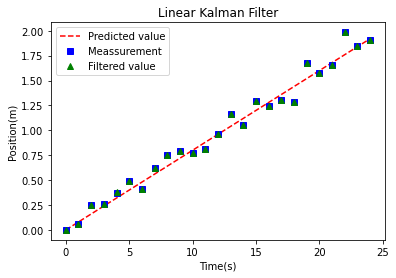

In [7]:
plt.plot(x_pred[0:len(x_pred):40],'r--', label = 'Predicted value')
plt.plot(x_meassured[0:len(x_meassured):40], 'bs', label = 'Meassurement')
plt.plot(x_filtered[0:len(x_filtered):40],'g^', label = 'Filtered value')
plt.title("Linear Kalman Filter")
plt.ylabel("Position(m)")
plt.xlabel("Time(s)")
plt.legend()
plt.show()